In [1]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\ML\\Personal_Health_Tracker_Combined.csv")
df.head(5)

,Timestamp,Email address,Age,Sex,Weight(kg),Height(cm),Sleeping Hours(Average),Resting Hours(Average),Steps per Day,Stress Level,Activity Level,I understand that my responses are anonymous and will be used solely for research purposes related to Personal Health Tracker analysis and early screening models.
0,24-10-2025 19:05,22cs01042@iitbbs.ac.in,20,Male,82,185.0,7 hours,8,1000,0(low stress),2 (moderate),I consent to participate in this survey.
1,25-10-2025 08:19,sayande5673@gmail.com,24,Male,60,163.0,7 hours,1,5000,0(low stress),3 (active),I consent to participate in this survey.
2,25-10-2025 09:05,25me01029@iitbbs.ac.in,19,Male,59,157.0,6 hours,02-Jan,300,0(low stress),2 (moderate),I consent to participate in this survey.
3,25-10-2025 09:07,prashantk70155@gmail.com,21,Male,80,182.0,6 hours,2,1000,1(high stress),1 (light),I consent to participate in this survey.
4,25-10-2025 09:07,anneshaguha2018@gmail.com,23,Female,60,154.0,5 hours,6,3000,1(high stress),2 (moderate),I consent to participate in this survey.


In [5]:
df.columns

Index(['Timestamp', 'Email address', 'Age', 'Sex', 'Weight(kg)', 'Height(cm)',
       'Sleeping Hours(Average)', 'Resting Hours(Average)', 'Steps per Day',
       'Stress Level', 'Activity Level',
       'I understand that  my responses are anonymous and will be used solely for research purposes related to Personal Health Tracker analysis and early screening models.'],
      dtype='object')

In [6]:
df=df.drop(['Timestamp','Email address', 'I understand that  my responses are anonymous and will be used solely for research purposes related to Personal Health Tracker analysis and early screening models.'],axis=1)

In [7]:
df

,Age,Sex,Weight(kg),Height(cm),Sleeping Hours(Average),Resting Hours(Average),Steps per Day,Stress Level,Activity Level
0,20,Male,82,185.0,7 hours,8,1000,0(low stress),2 (moderate)
1,24,Male,60,163.0,7 hours,1,5000,0(low stress),3 (active)
2,19,Male,59,157.0,6 hours,02-Jan,300,0(low stress),2 (moderate)
3,21,Male,80,182.0,6 hours,2,1000,1(high stress),1 (light)
4,23,Female,60,154.0,5 hours,6,3000,1(high stress),2 (moderate)
...,...,...,...,...,...,...,...,...,...
106,19,Male,55,159.0,6,1,2000,1(high stress),2
107,53,Male,66,159.0,5,4,8000,1(high stress),2
108,23,Female,65,168.0,7,1,7500,1(high stress),1
109,37,Female,72,165.0,5,2,5600,1(high stress),2


In [8]:
df['Sleeping Hours(Average)'] = df['Sleeping Hours(Average)'].str.replace('hours', '', regex=False)
df['Stress Level'] = df['Stress Level'].str.replace('(low stress)', '', regex=False)
df['Stress Level'] = df['Stress Level'].str.replace('(high stress)', '', regex=False)
df['Activity Level'] = df['Activity Level'].str.replace('(moderate)', '', regex=False)
df['Activity Level'] = df['Activity Level'].str.replace('(active)', '', regex=False)
df['Activity Level'] = df['Activity Level'].str.replace('(light)', '', regex=False)
df['Activity Level'] = df['Activity Level'].str.replace('(sedentary)', '', regex=False)
df['Resting Hours(Average)'] = df['Resting Hours(Average)'].str.replace('-Jan', '', regex=False)

In [9]:
df

,Age,Sex,Weight(kg),Height(cm),Sleeping Hours(Average),Resting Hours(Average),Steps per Day,Stress Level,Activity Level
0,20,Male,82,185.0,7,8,1000,0,2
1,24,Male,60,163.0,7,1,5000,0,3
2,19,Male,59,157.0,6,02,300,0,2
3,21,Male,80,182.0,6,2,1000,1,1
4,23,Female,60,154.0,5,6,3000,1,2
...,...,...,...,...,...,...,...,...,...
106,19,Male,55,159.0,6,1,2000,1,2
107,53,Male,66,159.0,5,4,8000,1,2
108,23,Female,65,168.0,7,1,7500,1,1
109,37,Female,72,165.0,5,2,5600,1,2


In [10]:
df['Sex']=np.where(df['Sex']=='Male',1,0)

In [11]:
df

,Age,Sex,Weight(kg),Height(cm),Sleeping Hours(Average),Resting Hours(Average),Steps per Day,Stress Level,Activity Level
0,20,1,82,185.0,7,8,1000,0,2
1,24,1,60,163.0,7,1,5000,0,3
2,19,1,59,157.0,6,02,300,0,2
3,21,1,80,182.0,6,2,1000,1,1
4,23,0,60,154.0,5,6,3000,1,2
...,...,...,...,...,...,...,...,...,...
106,19,1,55,159.0,6,1,2000,1,2
107,53,1,66,159.0,5,4,8000,1,2
108,23,0,65,168.0,7,1,7500,1,1
109,37,0,72,165.0,5,2,5600,1,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      111 non-null    int64  
 1   Sex                      111 non-null    int64  
 2   Weight(kg)               111 non-null    int64  
 3   Height(cm)               111 non-null    float64
 4   Sleeping Hours(Average)  111 non-null    object 
 5   Resting Hours(Average)   111 non-null    object 
 6   Steps per Day            111 non-null    int64  
 7   Stress Level             111 non-null    object 
 8   Activity Level           111 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 7.9+ KB


In [13]:
df['Activity Level']=df['Activity Level'].astype(int)
df['Sleeping Hours(Average)']=df['Sleeping Hours(Average)'].astype(int)
df['Resting Hours(Average)']=df['Resting Hours(Average)'].astype(int)
df['Stress Level']=df['Stress Level'].astype(int)

In [14]:
# Basal metabolic rate (Mifflin-St Jeor approximation)
# For men: BMR = 10*weight + 6.25*height - 5*age + 5
# For women: BMR = 10*weight + 6.25*height - 5*age - 161
df['BMR']=10 * df['Weight(kg)'] + 6.25 * df['Height(cm)'] - 5 * df['Age'] + np.where(df['Sex']==1,5, -161)
df['Activity_factor']=np.select([df['Activity Level']==0, df['Activity Level']==1,df['Activity Level']==2, df['Activity Level']==3],[1.2, 1.375, 1.55, 1.725])

In [15]:
df

,Age,Sex,Weight(kg),Height(cm),Sleeping Hours(Average),Resting Hours(Average),Steps per Day,Stress Level,Activity Level,BMR,Activity_factor
0,20,1,82,185.0,7,8,1000,0,2,1881.25,1.550
1,24,1,60,163.0,7,1,5000,0,3,1503.75,1.725
2,19,1,59,157.0,6,2,300,0,2,1481.25,1.550
3,21,1,80,182.0,6,2,1000,1,1,1837.50,1.375
4,23,0,60,154.0,5,6,3000,1,2,1286.50,1.550
...,...,...,...,...,...,...,...,...,...,...,...
106,19,1,55,159.0,6,1,2000,1,2,1453.75,1.550
107,53,1,66,159.0,5,4,8000,1,2,1393.75,1.550
108,23,0,65,168.0,7,1,7500,1,1,1424.00,1.375
109,37,0,72,165.0,5,2,5600,1,2,1405.25,1.550


In [16]:
df['Calories_needed'] = (df['BMR'] * df['Activity_factor']).round().astype(int)

In [17]:
df

,Age,Sex,Weight(kg),Height(cm),Sleeping Hours(Average),Resting Hours(Average),Steps per Day,Stress Level,Activity Level,BMR,Activity_factor,Calories_needed
0,20,1,82,185.0,7,8,1000,0,2,1881.25,1.550,2916
1,24,1,60,163.0,7,1,5000,0,3,1503.75,1.725,2594
2,19,1,59,157.0,6,2,300,0,2,1481.25,1.550,2296
3,21,1,80,182.0,6,2,1000,1,1,1837.50,1.375,2527
4,23,0,60,154.0,5,6,3000,1,2,1286.50,1.550,1994
...,...,...,...,...,...,...,...,...,...,...,...,...
106,19,1,55,159.0,6,1,2000,1,2,1453.75,1.550,2253
107,53,1,66,159.0,5,4,8000,1,2,1393.75,1.550,2160
108,23,0,65,168.0,7,1,7500,1,1,1424.00,1.375,1958
109,37,0,72,165.0,5,2,5600,1,2,1405.25,1.550,2178


In [18]:
# Fatigue label heuristic: 1 = fatigued
fatigue_prob = (
    0.3 * (df['Sleeping Hours(Average)'] < 6).astype(float) +
    0.3 * (df['Resting Hours(Average)'] > 85).astype(float) +
    0.4 * df['Stress Level']
)
fatigue_prob = np.clip(fatigue_prob, 0, 1)
df['Fatigue_label'] = (fatigue_prob > 0.5).astype(int)

In [19]:
df

,Age,Sex,Weight(kg),Height(cm),Sleeping Hours(Average),Resting Hours(Average),Steps per Day,Stress Level,Activity Level,BMR,Activity_factor,Calories_needed,Fatigue_label
0,20,1,82,185.0,7,8,1000,0,2,1881.25,1.550,2916,0
1,24,1,60,163.0,7,1,5000,0,3,1503.75,1.725,2594,0
2,19,1,59,157.0,6,2,300,0,2,1481.25,1.550,2296,0
3,21,1,80,182.0,6,2,1000,1,1,1837.50,1.375,2527,0
4,23,0,60,154.0,5,6,3000,1,2,1286.50,1.550,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,19,1,55,159.0,6,1,2000,1,2,1453.75,1.550,2253,0
107,53,1,66,159.0,5,4,8000,1,2,1393.75,1.550,2160,1
108,23,0,65,168.0,7,1,7500,1,1,1424.00,1.375,1958,0
109,37,0,72,165.0,5,2,5600,1,2,1405.25,1.550,2178,1


In [20]:
df.corr()

,Age,Sex,Weight(kg),Height(cm),Sleeping Hours(Average),Resting Hours(Average),Steps per Day,Stress Level,Activity Level,BMR,Activity_factor,Calories_needed,Fatigue_label
Age,1.000000,-0.462758,0.181114,-0.135987,0.131075,-0.000851,0.061204,0.177538,0.027153,-0.479824,0.027153,-0.398194,0.051435
Sex,-0.462758,1.000000,0.056084,0.137792,-0.012730,0.090485,-0.092149,-0.153384,0.029529,0.629010,0.029529,0.550234,-0.053351
Weight(kg),0.181114,0.056084,1.000000,0.088730,-0.059879,-0.088157,0.056816,-0.165651,0.068038,0.488782,0.068038,0.452778,-0.039394
Height(cm),-0.135987,0.137792,0.088730,1.000000,-0.064209,0.026232,0.097891,0.026856,-0.028763,0.686344,-0.028763,0.571050,-0.026173
Sleeping Hours(Average),0.131075,-0.012730,-0.059879,-0.064209,1.000000,0.115039,-0.063643,-0.205720,0.014102,-0.109880,0.014102,-0.093509,-0.540362
Resting Hours(Average),-0.000851,0.090485,-0.088157,0.026232,0.115039,1.000000,-0.138705,-0.179689,0.068150,0.007184,0.068150,0.035818,-0.043309
Steps per Day,0.061204,-0.092149,0.056816,0.097891,-0.063643,-0.138705,1.000000,0.216828,0.100385,0.026370,0.100385,0.077109,0.096196
Stress Level,0.177538,-0.153384,-0.165651,0.026856,-0.205720,-0.179689,0.216828,1.000000,-0.148977,-0.178444,-0.148977,-0.224429,0.276194
Activity Level,0.027153,0.029529,0.068038,-0.028763,0.014102,0.068150,0.100385,-0.148977,1.000000,0.019278,1.000000,0.517670,-0.184108
BMR,-0.479824,0.629010,0.488782,0.686344,-0.109880,0.007184,0.026370,-0.178444,0.019278,1.000000,0.019278,0.863870,-0.069635


<Axes: >

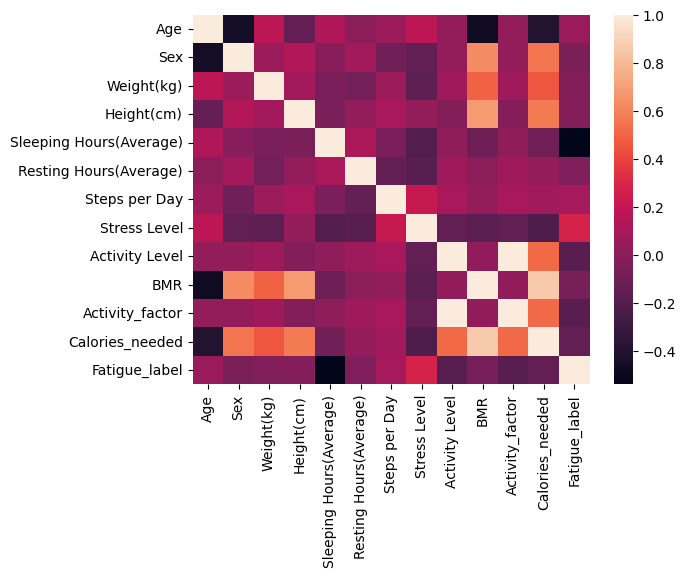

In [21]:
sns.heatmap(df.corr())

In [22]:
df.columns

Index(['Age', 'Sex', 'Weight(kg)', 'Height(cm)', 'Sleeping Hours(Average)',
       'Resting Hours(Average)', 'Steps per Day', 'Stress Level',
       'Activity Level', 'BMR', 'Activity_factor', 'Calories_needed',
       'Fatigue_label'],
      dtype='object')

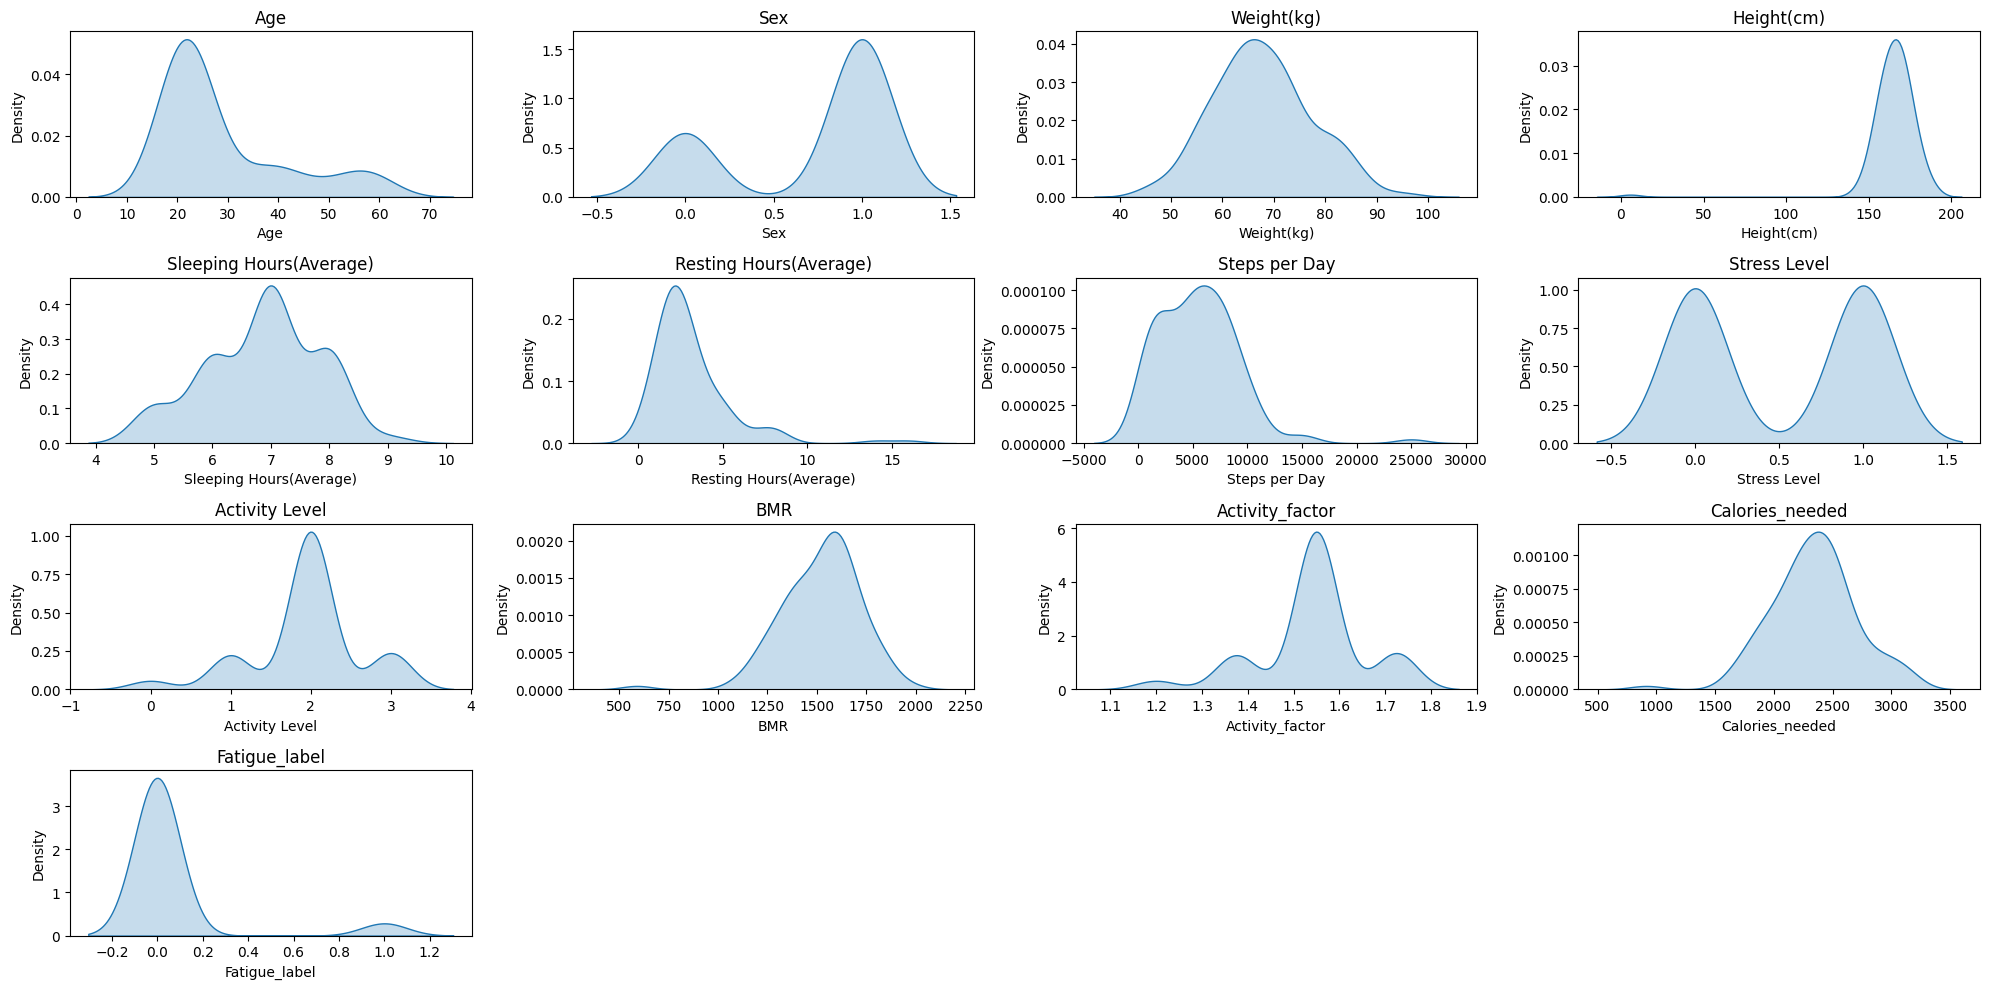

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

i = 1
for col in df.columns:
    plt.subplot(4, 4, i)
    sns.kdeplot(df[col], fill=True)
    plt.title(col)
    i += 1

plt.tight_layout()
plt.show()

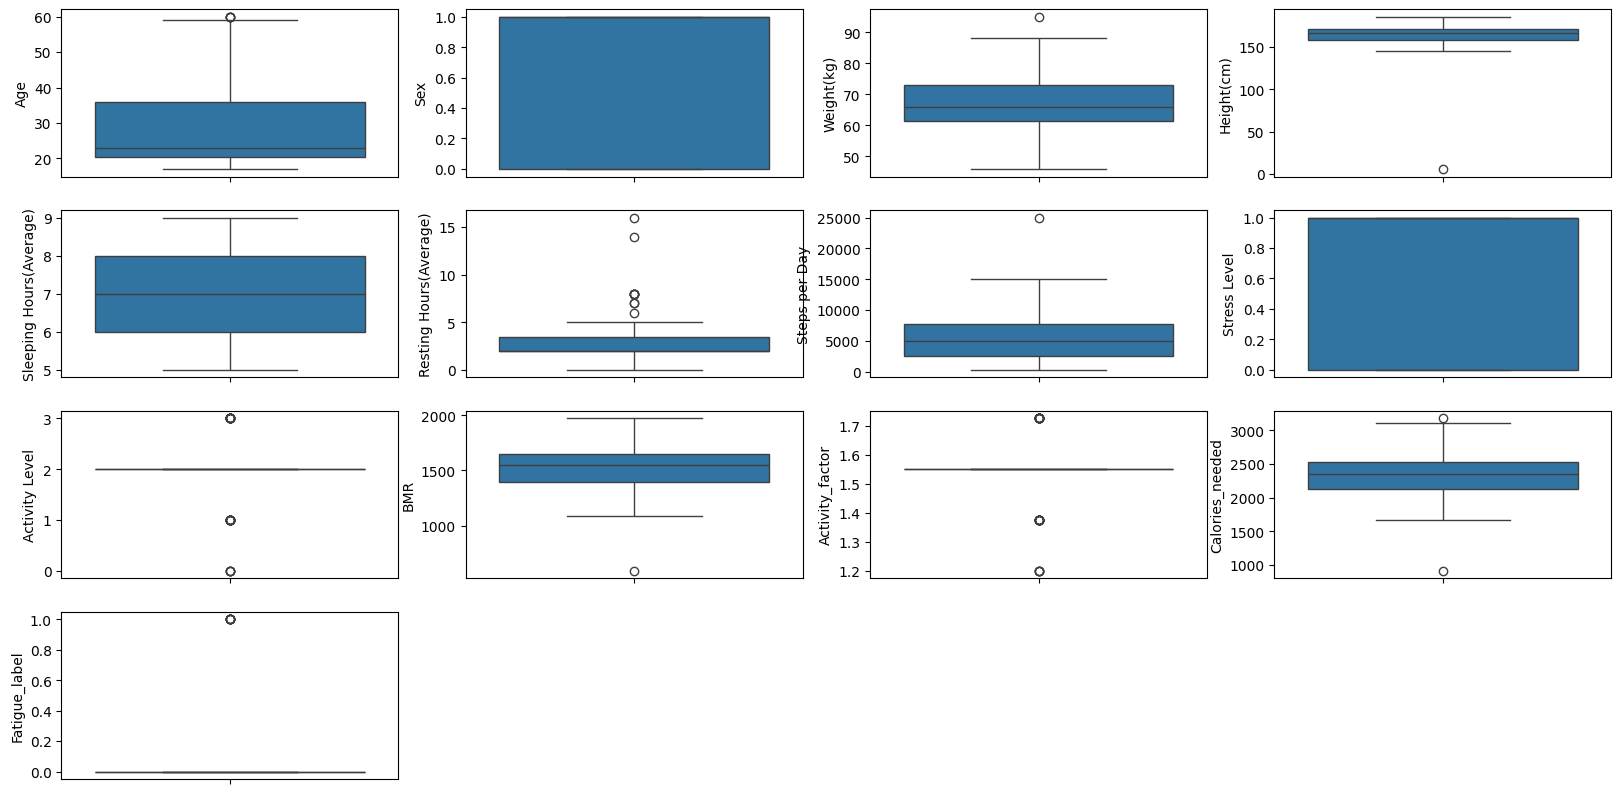

In [24]:
plt.figure(figsize=(20,10))

i=1

for col in df.columns:

  plt.subplot(4,4,i)

  sns.boxplot(df[col])

  i=i+1


In [25]:
df.head()

,Age,Sex,Weight(kg),Height(cm),Sleeping Hours(Average),Resting Hours(Average),Steps per Day,Stress Level,Activity Level,BMR,Activity_factor,Calories_needed,Fatigue_label
0,20,1,82,185.0,7,8,1000,0,2,1881.25,1.550,2916,0
1,24,1,60,163.0,7,1,5000,0,3,1503.75,1.725,2594,0
2,19,1,59,157.0,6,2,300,0,2,1481.25,1.550,2296,0
3,21,1,80,182.0,6,2,1000,1,1,1837.50,1.375,2527,0
4,23,0,60,154.0,5,6,3000,1,2,1286.50,1.550,1994,1


In [26]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, roc_auc_score,accuracy_score, classification_report,r2_score,mean_squared_error

In [28]:
#prediction for calories needed using RandomForestRegressor
X = df.drop(['Calories_needed', 'Fatigue_label'], axis=1)
y_reg = df['Calories_needed']
y_clf = df['Fatigue_label']

In [29]:
X.head(2)

,Age,Sex,Weight(kg),Height(cm),Sleeping Hours(Average),Resting Hours(Average),Steps per Day,Stress Level,Activity Level,BMR,Activity_factor
0,20,1,82,185.0,7,8,1000,0,2,1881.25,1.550
1,24,1,60,163.0,7,1,5000,0,3,1503.75,1.725


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2,random_state=42)

In [31]:
#Calories_need prediction using LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

mse=mean_squared_error(y_test,y_pred_lr)
r2=r2_score(y_test,y_pred_lr)
print("Mean Squared Error:-",mse)
print("R2_score",r2)

Mean Squared Error:- 64.74416220751475
R2_score 0.9991266659093164


In [32]:
#Calories_need prediction using RandomForest
reg = RandomForestRegressor(n_estimators=200, random_state=42,max_depth=10)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [34]:
reg.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [35]:
preds = reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds))
print("Mean Squared_Error:",mean_squared_error(y_test,preds))

MAE: 25.196250862663863
Mean Squared_Error: 2149.6264852783


In [36]:
print('R2:', r2_score(y_test, preds))

R2: 0.9710036854625942


In [37]:
import os
import joblib

if "__file__" in globals():
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
else:
    BASE_DIR = os.getcwd()

MODEL_DIR = os.path.join(BASE_DIR, "models")
os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(reg, os.path.join(MODEL_DIR, "calorie_model.joblib"))




['c:\\Users\\User\\OneDrive\\Desktop\\ML\\models\\calorie_model.joblib']

In [38]:
X.shape

(111, 11)

In [39]:
y_reg.shape

(111,)

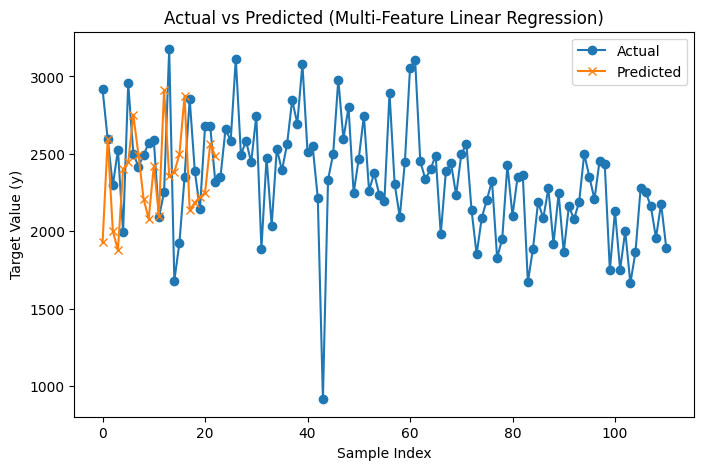

In [40]:
plt.figure(figsize=(8,5))

plt.plot(y_reg, label="Actual", marker='o')
plt.plot(y_pred_lr, label="Predicted", marker='x')

plt.xlabel("Sample Index")
plt.ylabel("Target Value (y)")
plt.title("Actual vs Predicted (Multi-Feature Linear Regression)")
plt.legend()
plt.show()

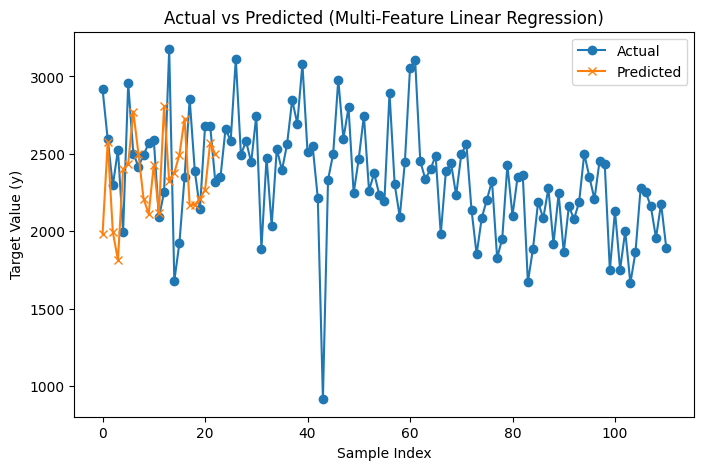

In [41]:
plt.figure(figsize=(8,5))

plt.plot(y_reg, label="Actual", marker='o')
plt.plot(preds, label="Predicted", marker='x')

plt.xlabel("Sample Index")
plt.ylabel("Target Value (y)")
plt.title("Actual vs Predicted (Multi-Feature Linear Regression)")
plt.legend()
plt.show()

In [42]:

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf,test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_c = scaler.fit_transform(X_train_c)
X_test_c  = scaler.transform(X_test_c)

In [44]:
#prediction of fatigue_label using LogisticRegression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train_c,y_train_c)
y_pred_lg=lg.predict(X_test_c)

accuracy_score(y_test_c,y_pred_lg)

0.8695652173913043

In [45]:
#prediction of fatigue_label using RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, class_weight='balanced',random_state=42)

In [46]:
clf.fit(X_train_c, y_train_c)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [47]:
yhat = clf.predict(X_test_c)

In [48]:
print('Accuracy:', accuracy_score(y_test_c, yhat))

Accuracy: 0.9130434782608695


In [49]:
print(classification_report(y_test_c, yhat))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.33      0.50         3

    accuracy                           0.91        23
   macro avg       0.95      0.67      0.73        23
weighted avg       0.92      0.91      0.89        23



In [50]:
os.makedirs("../models", exist_ok=True)
joblib.dump(clf, '../models/fatigue_model.joblib')

['../models/fatigue_model.joblib']

In [51]:
import os
import joblib

if "__file__" in globals():
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
else:
    BASE_DIR = os.getcwd()

MODEL_DIR = os.path.join(BASE_DIR, "models")
os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(clf, os.path.join(MODEL_DIR, "fatigue_model.joblib"))


['c:\\Users\\User\\OneDrive\\Desktop\\ML\\models\\fatigue_model.joblib']

In [52]:
#Prediction Example

Age=30
Sex=1
Weight_kg=75
Height_cm=175
Sleep_hour=8
Rest_hour=2
Activity_level=2
Steps_per_day=8000
Stress_level=1


bmr = 10 * Weight_kg + 6.25 * Height_cm - 5 * Age + np.where(Sex==1,
5, -161)
activity_factor = np.select([Activity_level==0, Activity_level==1,
Activity_level==2, Activity_level==3],
[1.2, 1.375, 1.55, 1.725])
print("BMR:",bmr)
print("Activity_Factor:",activity_factor)


BMR: 1698.75
Activity_Factor: 1.55


In [53]:
sample =np.array([30,1,75,175,6,2,8000,1,2,1698.75,1.55]).reshape(1,-1)

In [54]:
lg.predict(sample)

array([1])

In [55]:
reg.predict(sample)

array([2966.325])

In [56]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
%%writefile app.py

import streamlit as st

st.title("Welcome to personal Health Tracker")

Overwriting app.py
